#### Імпорт бібліотек

In [118]:
%matplotlib widget 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import basinhopping
import time
import random
import math

#### Функція за варіантом

In [33]:
def f(x, y):
    return 837.9657 - x * np.sin(np.sqrt(np.abs(x))) - y * np.sin(np.sqrt(np.abs(y)))

x = np.linspace(-500, 500, 100)
y = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#### 2. Тривімірний графік заданої функції

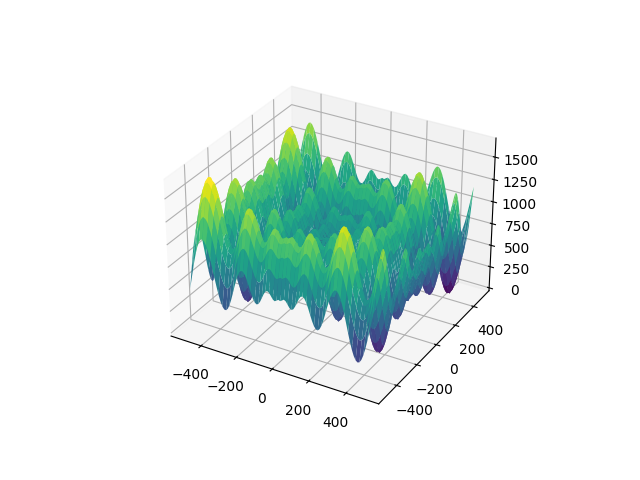

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_3D = ax.plot_surface(X, Y, Z, cmap='viridis')

#### 3. Алгоритм простого стохастичного пошуку глобального мінімуму цільової функції

Задамо діапазон пошуку та кількість випадкових точок

In [158]:
x_min, x_max = -500, 500
y_min, y_max = -500, 500

num_points = 10000

Ініціалізуємо мінімуми нашої функції

In [71]:
global_min_x = None
global_min_y = None
global_min_f = float('inf')

Реалізація алгоритму

In [169]:
start_time = time.time()
for _ in range(num_points):
    x_rand = np.random.uniform(x_min, x_max)
    y_rand = np.random.uniform(y_min, y_max)
    f_rand = f(x_rand, y_rand)
    
    if f_rand < global_min_f:
        global_min_f = f_rand
        global_min_x = x_rand
        global_min_y = y_rand

res_time = time.time() - start_time

Виведення результатів

In [170]:
print(f"Глобальний мінімум приблизно у точці x = {global_min_x:.4f}, y = {global_min_y:.4f}")
print(f"Мінімальне значення функції: f(x, y) = {global_min_f:.4f}")
print(f"Час: {res_time} с. Кількість ітерацій: {num_points}")

Глобальний мінімум приблизно у точці x = 421.3875, y = 421.9089
Мінімальне значення функції: f(x, y) = 0.1336
Час: 0.10352325439453125 с. Кількість ітерацій: 10000


#### 4. Алгоритм методу імітації відпалу

Адаптуємо нашу функцію для scipy

In [63]:
def objective_function(xy):
    x, y = xy
    return f(x, y)

Задамо параметри для мінімізатора

In [61]:
minimizer_kwargs = {"method": "L-BFGS-B", "bounds": [(-500, 500), (-500, 500)]}

Запустимо метод імітації відпалу за допомогою функції **bassinhopping**

In [165]:
start_time = time.time()
result = basinhopping(objective_function, [0, 0], minimizer_kwargs=minimizer_kwargs, niter=10000)
res_time = time.time() - start_time

Виведення результатів

In [167]:
print(f'Мінімальне значення (імітація відпалу): {result.fun:.4f} при x={result.x[0]:.4f}, y={result.x[1]:.4f}')
print(f"Час: {res_time} с. Кількість ітерацій: 10 000")

Мінімальне значення (імітація відпалу): -0.0001 при x=420.9687, y=420.9687
Час: 15.699788570404053 с. Кількість ітерацій: 10 000


#### 5. Порівняння різних законів зміни температури в методі імітації відпалу

Задамо функції зниження температури

In [120]:
def linear_cooling(T0, alpha, k):
    return max(T0 - alpha * k, 1e-3)

def geometric_cooling(T0, beta, k):
    return T0 * (beta ** k)

def logarithmic_cooling(T0, gamma, k):
    return T0 / (1 + gamma * np.log(1 + k))

def inverse_cooling(T0, delta, k):
    return T0 / (1 + delta * k)

Реалізація методу імітації відпалу

In [150]:
def simulated_annealing(temp_schedule, name, max_iter=10000):
    start_time = time.time()
    
    x, y = np.random.uniform(-500, 500), np.random.uniform(-500, 500)
    best_x, best_y = x, y
    best_f = f(x, y)
    
    T0 = 1000  
    
    for i in range(1, max_iter + 1):
        T = temp_schedule(T0, i)
        
        new_x = x + np.random.uniform(-10, 10)
        new_y = y + np.random.uniform(-10, 10)
        
        new_x = np.clip(new_x, -500, 500)
        new_y = np.clip(new_y, -500, 500)

        f_new = f(new_x, new_y)
        delta_f = f_new - f(x, y)

        if delta_f < 0 or np.random.rand() < np.exp(-delta_f / T):
            x, y = new_x, new_y

        if f(x, y) < best_f:
            best_f = f(x, y)
            best_x, best_y = x, y
    
    res_time = time.time() - start_time
    print(f"{name}:\t мінімум {best_f:.4f} при x={best_x:.4f}, y={best_y:.4f} | час: {res_time:.4f} с.")

Виконання кожного закону

In [151]:
simulated_annealing(linear, "Лінійний закон")
simulated_annealing(exponential, "Геометричний закон")
simulated_annealing(logarithmic, "Логарифмічний закон")
simulated_annealing(inverse, "Інверсійний закон")

Лінійний закон:	 мінімум 236.8785 при x=-302.5498, y=-302.4056 | час: 0.3241 с.
Геометричний закон:	 мінімум 0.0014 при x=420.8928, y=420.8930 | час: 0.3317 с.
Логарифмічний закон:	 мінімум 300.4685 при x=-119.4643, y=418.6238 | час: 0.3308 с.
Інверсійний закон:	 мінімум 1.8783 при x=417.6044, y=419.0737 | час: 0.3137 с.
